In [6]:
from joblib import load
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [7]:
rf2023 = load('models/2023_rf_100tree.joblib')
test_x_2023 = pd.read_csv('data/test_x_2023.csv')
test_y_2023 = pd.read_csv('data/test_y_2023.csv')
c2_whole_2023 = pd.read_csv('data/c2_whole_2023.csv')
names_2023 = c2_whole_2023['Name'].reset_index(drop=True)
positions_2023 = c2_whole_2023['position'].reset_index(drop=True)

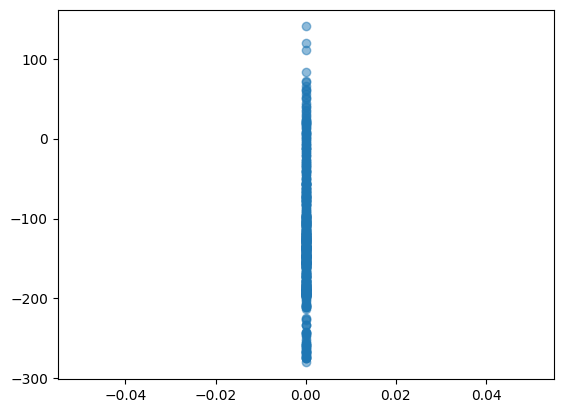

In [8]:
#quick regression
preds = rf2023.predict(test_x_2023)
plt.scatter(test_y_2023, preds, alpha=.5)

In [ ]:
#residuals plot

residuals = test_y_2023 - preds

# Plot residuals
plt.scatter(test_y_2023, residuals, alpha=0.5)
plt.title('Residuals vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
#residuals histogram
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [ ]:
#qq plot
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [ ]:
#eval metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test_y, preds)
mse = mean_squared_error(test_y, preds)
r2 = r2_score(test_y, rf.predict(test_x))

print(f"MAE: {mae}, MSE: {mse}, R^2: {r2}")

In [ ]:
#calibration
df_calib = pd.DataFrame({'predictions': preds, 'true': test_y})
df_calib['pred_decile'] = pd.qcut(preds, q=10, labels=False)
grouped = df_calib.groupby('pred_decile').mean()

plt.plot(grouped['predictions'], grouped['true'], 'o-', label='Random Forest')
plt.plot([min(preds), max(preds)], [min(preds), max(preds)], 'k--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Value')
plt.ylabel('Mean True Value')
plt.title('Calibration Plot')
plt.legend()
plt.show()